In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#cargar conjunto de datos
mnist = keras.datasets.mnist
#division de entrenamiento
(traing_imagenes, traing_labels), (test_imagenes, test_labels) = mnist.load_data()

#normalizar datos
traing_imagenes = traing_imagenes / 255.0
test_imagenes = test_imagenes / 255.0

#construir el modelo de clasificacion
model=keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (

Epoch 1/10
1875/1875 [==============================] - 65s 32ms/step - loss: 0.1451 - accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0497 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0313 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 41s 22m

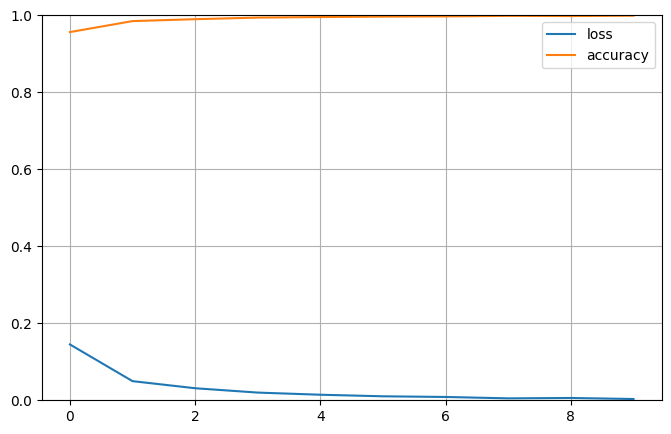

In [3]:
#compilacion modelo

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#entrenar modelo
history=model.fit(traing_imagenes, traing_labels, epochs=10)

#graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [4]:
#evaluacion del modelo entrenamiento

loss, accuracy = model.evaluate(traing_imagenes, traing_labels)
print("perdida en el conjunto de entrenamiento", loss)
print("precicion en el conjunto de entrenamiento ", accuracy)

#evaluacion del modelo con datos no vistos

loss, accuracy = model.evaluate(test_imagenes, test_labels)
print("perdida en el conjunto de prueba", loss)
print("precicion en el conjunto de prueba ", accuracy)




1875/1875 [==============================] - 25s 13ms/step - loss: 0.0029 - accuracy: 0.9990
perdida en el conjunto de entrenamiento 0.002880855230614543
precicion en el conjunto de entrenamiento  0.9989500045776367
313/313 [==============================] - 3s 10ms/step - loss: 0.0545 - accuracy: 0.9880
perdida en el conjunto de prueba 0.05448714643716812
precicion en el conjunto de prueba  0.9879999756813049


label: 2
1/1 [==============================] - 0s 211ms/step
clasificacion: [[1.2835534e-14]
 [1.3400706e-12]
 [1.0000000e+00]
 [3.9315793e-23]
 [5.4033703e-23]
 [1.8298376e-26]
 [2.8805342e-15]
 [6.2108862e-26]
 [2.1296476e-19]
 [1.7763895e-19]]


<function matplotlib.pyplot.show(close=None, block=None)>

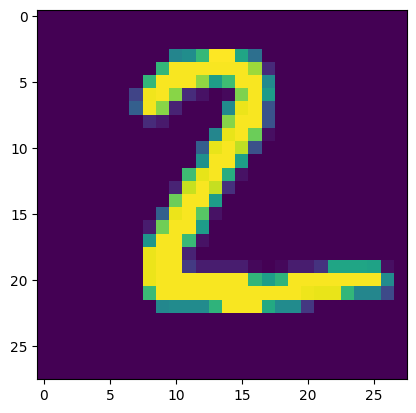

In [5]:
#prediccion
index=1
print (f"label: {test_labels[index]}")
clasificacion=model.predict(test_imagenes[index:index+1])
print(f'clasificacion: {clasificacion.reshape(-1,1)}')
plt.imshow(test_imagenes[index])
plt.show

In [6]:
print (test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [7]:
First_image=3
second_image=10
third_image=25

print (test_labels[First_image])
print (test_labels[second_image])
print (test_labels[third_image])

0
0
0


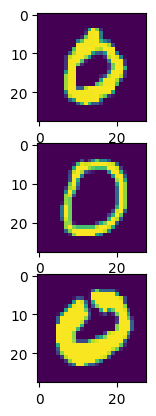

In [9]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_imagenes[First_image])
axarr[1].imshow(test_imagenes[second_image])
axarr[2].imshow(test_imagenes[third_image])


In [17]:
layer = 0
filter1= 0
filter2= 10
layer_outputs=[layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input ,outputs=layer_outputs)


1/1 [==============================] - 0s 37ms/step


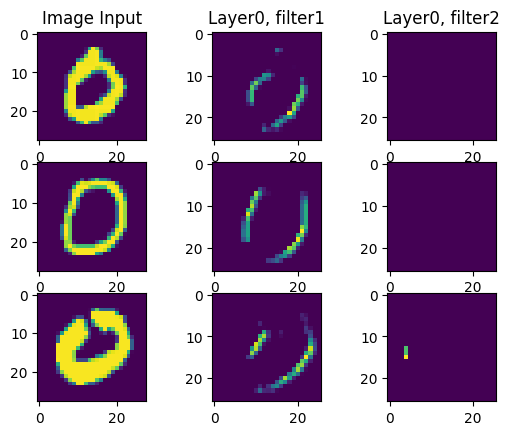

In [22]:
f, axarr = plt.subplots(3,3)
axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_imagenes[First_image])
f1 = activation_model.predict(test_imagenes[First_image].reshape(1,28,28,1))[layer]
axarr[0,1].set_title("Layer"+str(layer)+", filter1")
axarr[0,1].imshow(f1[0, : , : ,filter1])
axarr[0,2].set_title("Layer"+str(layer)+", filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_imagenes[second_image])
f2 = activation_model.predict(test_imagenes[second_image].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f2[0, : , : ,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_imagenes[third_image])
f3 = activation_model.predict(test_imagenes[third_image].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f3[0, : , : ,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])




#axarr[0,1].imshow(test_imagenes[second_image])
#axarr[0,2].imshow(test_imagenes[third_image])